<a href="https://colab.research.google.com/github/Maheshcheegiti/FML/blob/main/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
import random
# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)
# Initialize weights using Kaiming initialization
for module in model.modules():
    if isinstance(module, nn.Linear):
        nn.init.kaiming_uniform_(module.weight, nonlinearity='relu')
# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum = 0.9);


# Define the learning rate scheduler
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
# scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0)

# Define the normalization transform
transform = torchvision.transforms.Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Load the MNIST dataset and create data loaders
torch.manual_seed(123)
np.random.seed(123)

train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=False)

test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=ToTensor(), download=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Train the model for several epochs

num_epoch = 15;
for epoch in range(num_epoch):
    # Train the model on the training data
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    model.train()  # switch to train mode
    for inputs, labels in train_loader:
        # Flatten the input images
        inputs = inputs.view(inputs.shape[0], -1)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Compute the loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Keep track of the loss and accuracy
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        
    train_loss /= len(train_loader.dataset)
    train_accuracy = 100.0 * train_correct / train_total
    
    # Evaluate the model on the test data
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    model.eval()  # switch to eval mode
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Flatten the input images
            inputs = inputs.view(inputs.shape[0], -1)
            # Forward pass
            outputs = model(inputs)
            # Compute the loss
            loss = criterion(outputs, labels)
            # Keep track of the loss and accuracy
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            predicted_labels = [test_data.classes[i] for i in predicted]
            actual_labels = [test_data.classes[i] for i in labels]
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100.0 * test_correct / test_total
    
    # Print the loss and accuracy for this epoch
    print(f"Epoch {epoch+1}/{15} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")
    print("Actual Labels:", actual_labels)
    print("Predicted Labels:", predicted_labels)


Epoch 1/15 - Train Loss: 0.2936, Train Acc: 91.23%, Test Loss: 0.1521, Test Acc: 95.17%
Actual Labels: ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine', '0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six']
Predicted Labels: ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine', '0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six']
Epoch 2/15 - Train Loss: 0.1161, Train Acc: 96.54%, Test Loss: 0.1010, Test Acc: 96.73%
Actual Labels: ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine', '0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six']
Predicted Labels: ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine', '0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - 

In [47]:
torch.save(model.state_dict(), '/content/drive/MyDrive/MNIST_Classifier_Model/mnist_model.pt')

In [57]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize
from PIL import Image
from PIL import ImageOps

# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

# Load the saved model
model.load_state_dict(torch.load('/content/drive/MyDrive/MNIST_Classifier_Model/mnist_model.pt'))

# Set the model to evaluation mode
model.eval()

# Load the image
img = Image.open('/content/drive/MyDrive/SampleImages/1.jpg')

# # Invert the image
inverted_img = ImageOps.invert(img)

# Apply the same transformations as for the training data
transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                            torchvision.transforms.Resize((28,28)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5,), (0.5,))])

# Preprocess the image
img_tensor = transform(inverted_img).unsqueeze(0)
img_tensor = img_tensor.view(-1, 784)  # flatten the tensor

# Make a prediction using the model
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output.data, 1)
    predicted_label = str(predicted.item())
    
print("Predicted label:", predicted_label)


Predicted label: 1


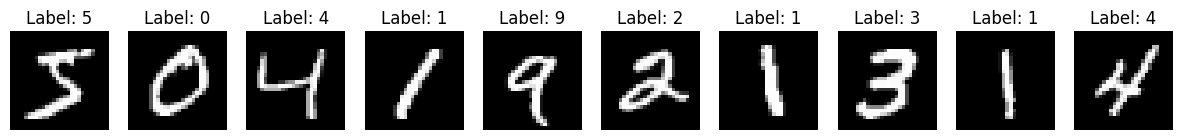

Label: 3
Predicted label: 3


In [50]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize
from PIL import Image
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

# Download the MNIST dataset
train_data = MNIST(root='./data', train=True, download=True)

# Display the first 10 images
fig, axs = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    img, label = train_data[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')
plt.show()

# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

# Load the saved model
model.load_state_dict(torch.load('/content/drive/MyDrive/MNIST_Classifier_Model/mnist_model.pt'))

# Set the model to evaluation mode
model.eval()

# Get a single image from the dataset
img, label = train_data[12]
print(f"Label: {label}")


# Apply the same transformations as for the training data
transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                            torchvision.transforms.Resize((28,28)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5,), (0.5,))])

# Preprocess the image
img_tensor = transform(img).unsqueeze(0)
img_tensor = img_tensor.view(-1, 784)  # flatten the tensor

# Make a prediction using the model
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output.data, 1)
    predicted_label = str(predicted.item())
    
print("Predicted label:", predicted_label)
